We will use the Wine Quality Data Set available from the UCI Machine Learning Repository. This data actually consists of two datasets depicting various attributes of red and white variants of the Portuguese “Vinho Verde” wine. All the analyses in this article is available in my GitHub repository as a Jupyter Notebook for those of you itching to try it out yourself!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Let’s take a look at the data after some basic data pre-processing steps. We will create a single data frame wines by merging both the datasets pertaining to red and white wine samples. We also create a new categorical variable quality_label based on the quality attribute of wine samples.

In [2]:
white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine = pd.read_csv('winequality-red.csv', sep=';')

# store wine type as an attribute
red_wine['wine_type'] = 'red'   
white_wine['wine_type'] = 'white'

# bucket wine quality scores into qualitative quality labels
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low' 
                                                          if value <= 5 else 'medium' 
                                                              if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], 
                                           categories=['low', 'medium', 'high'])
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' 
                                                              if value <= 5 else 'medium' 
                                                                  if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], 
                                             categories=['low', 'medium', 'high'])

# merge red and white wine datasets
wines = pd.concat([red_wine, white_wine])

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


Let’s do a quick basic descriptive summary statistics on some of these attributes of interest.

In [3]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 
                     'alcohol', 'volatile acidity', 'quality']
rs = round(red_wine[subset_attributes].describe(),2)
ws = round(white_wine[subset_attributes].describe(),2)

pd.concat([rs, ws], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])


Red Wine Statistics                                          \
           residual sugar total sulfur dioxide sulphates  alcohol   
count             1599.00              1599.00   1599.00  1599.00   
mean                 2.54                46.47      0.66    10.42   
std                  1.41                32.90      0.17     1.07   
min                  0.90                 6.00      0.33     8.40   
25%                  1.90                22.00      0.55     9.50   
50%                  2.20                38.00      0.62    10.20   
75%                  2.60                62.00      0.73    11.10   
max                 15.50               289.00      2.00    14.90   

                                White Wine Statistics                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          1599.00  1599.00               4898.00              4898.00   
mean              0.53     5.64                  6.39               138.36   
std               0.18     0.81                  5.07                42.50   
min               0.12     3.00                  0.60                 9.00   
25%               0.39     5.00                  1.70               108.00   
50%               0.52     6.00                  5.20               134.00   
75%               0.64     6.00                  9.90               167.00   
max               1.58     8.00                 65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

### Univariate Analysis
Univariate analysis is basically the simplest form of data analysis or visualization where we are only concerned with analyzing one data attribute or variable and visualizing the same (one dimension).

### Visualizing data in One Dimension (1-D) - Data Distribution
One of the quickest and most effective ways to visualize all numeric data and their distributions, is to leverage histograms using pandas

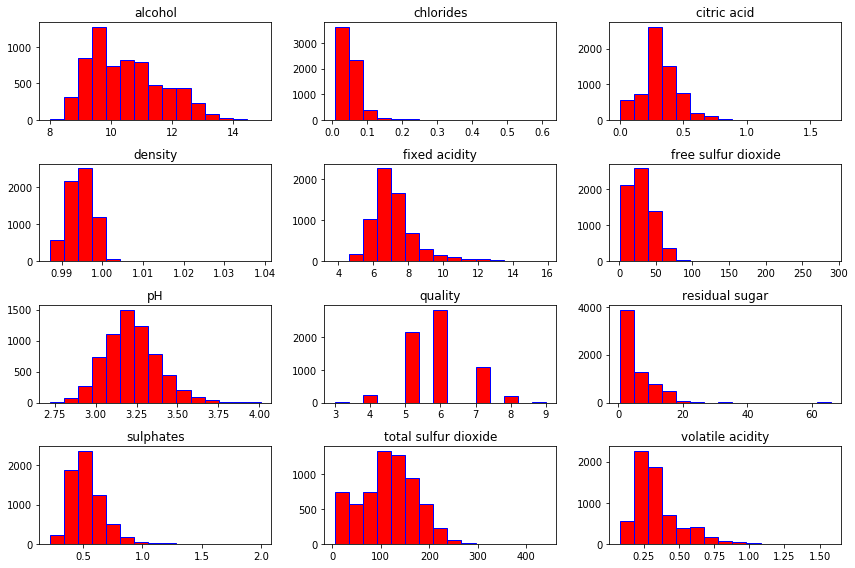

In [4]:
wines.hist(bins=15, color='red', edgecolor='blue', linewidth=1.0,
           xlabelsize=10, ylabelsize=10, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2))

### Visualizing one of the continuous, numeric attributes
how the data is distributed for that attribute.

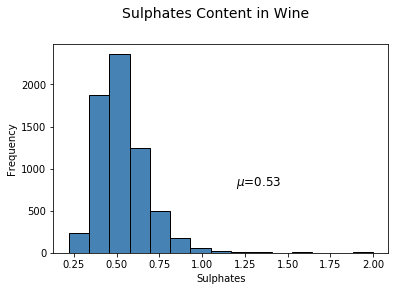

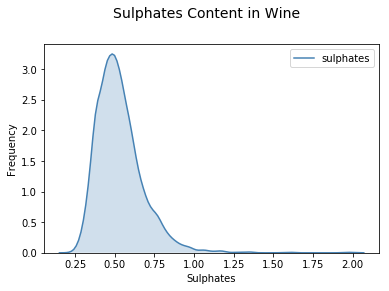

In [19]:
# Histogram
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(wines['sulphates'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(wines['sulphates'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)
                                    

# Density Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
sns.kdeplot(wines['sulphates'], ax=ax1, shade=True, color='steelblue')


### Visualizing a discrete, categorical data attribute

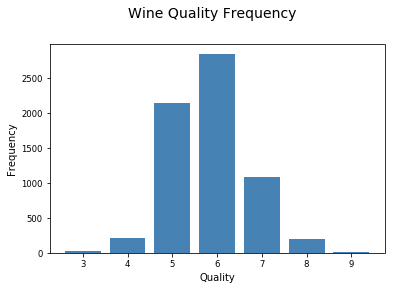

In [20]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Wine Quality Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Quality")
ax.set_ylabel("Frequency") 
w_q = wines['quality'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue')

## Multivariate Analysis
Multivariate analysis not only involves just checking out distributions but also potential relationships, patterns and correlations amongst these attributes.

### Visualizing data in Two Dimensions (2-D)
One of the best ways to check out potential relationships or correlations amongst the different data attributes is to leverage a pair-wise correlation matrix and depict it as a heatmap.

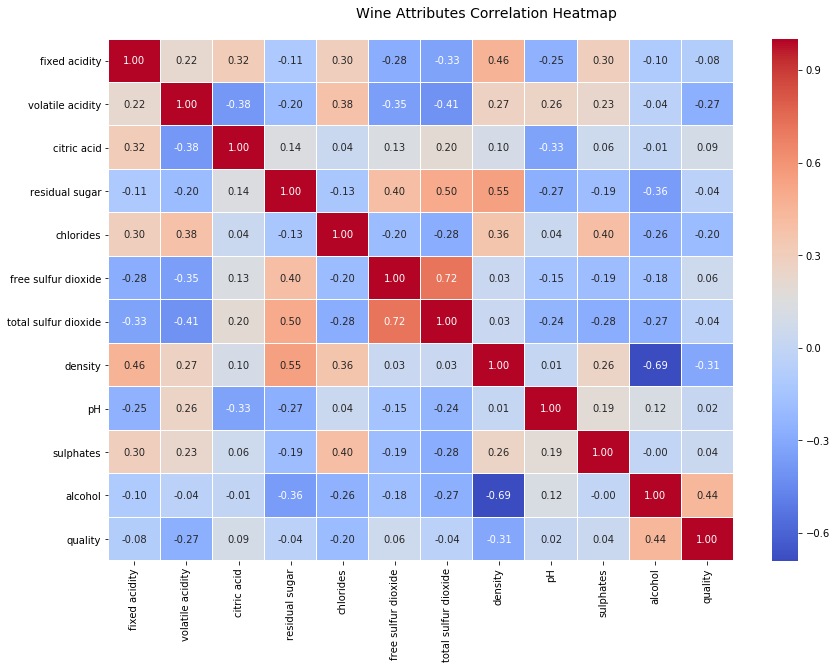

In [24]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(14, 9))
corr = wines.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

The gradients in the heatmap vary based on the strength of the correlation and you can clearly see it is very easy to spot potential attributes having strong correlations amongst themselves. Another way to visualize the same is to use pair-wise scatter plots amongst attributes of interest.

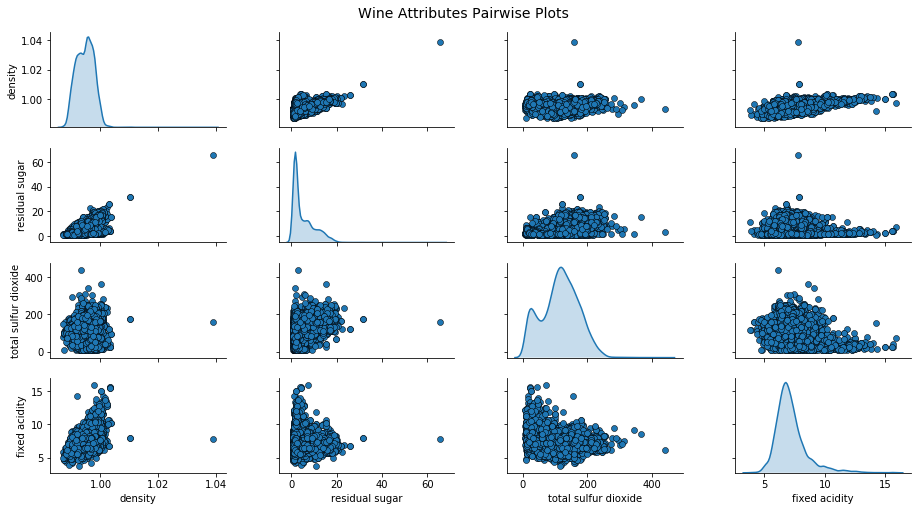

In [25]:
# Pair-wise Scatter Plots
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
pp = sns.pairplot(wines[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

Another way of visualizing multivariate data for multiple attributes together is to use __parallel coordinates__.

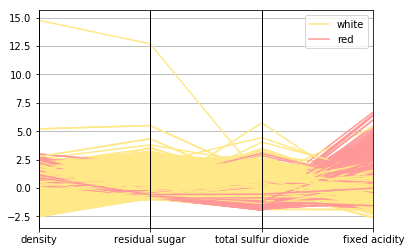

In [26]:
# Scaling attribute values to avoid few outiers
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
subset_df = wines[cols]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, wines['wine_type']], axis=1)
final_df.head()

# plot parallel coordinates
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'wine_type', color=('#FFE888', '#FF9999'))

Basically, in this visualization as depicted above, points are represented as connected line segments. Each vertical line represents one data attribute. One complete set of connected line segments across all the attributes represents one data point. Hence points that tend to cluster will appear closer together. Just by looking at it, we can clearly see that density is slightly more for red wines as compared to white wines. Also residual sugar and total sulfur dioxide is higher for white wines as compared to red and fixed acidity is higher for red wines as compared to white wines. Check out the statistics from the statistic table we derived earlier to validate this assumption!



Let’s look at some ways in which we can visualize two continuous, numeric attributes. Scatter plots and joint plots in particular are good ways to not only check for patterns, relationships but also see the individual distributions for the attributes.

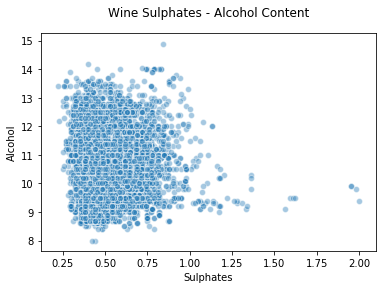

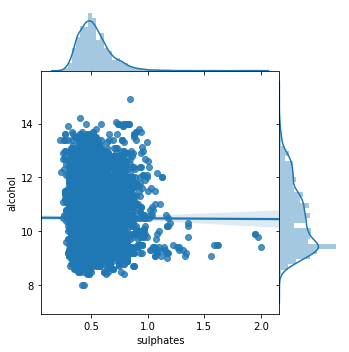

In [27]:
# Scatter Plot
plt.scatter(wines['sulphates'], wines['alcohol'],
            alpha=0.4, edgecolors='w')

plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.title('Wine Sulphates - Alcohol Content',y=1.05)


# Joint Plot
jp = sns.jointplot(x='sulphates', y='alcohol', data=wines,
                   kind='reg', space=0, size=5, ratio=4)

The scatter plot is depicted on the left side and the joint plot on the right in the above figure. Like we mentioned, you can check out correlations, relationships as well as individual distributions in the joint plot.

How about visualizing two discrete, categorical attributes? One way is to leverage separate plots (subplots) or facets for one of the categorical dimensions.

<BarContainer object of 7 artists>

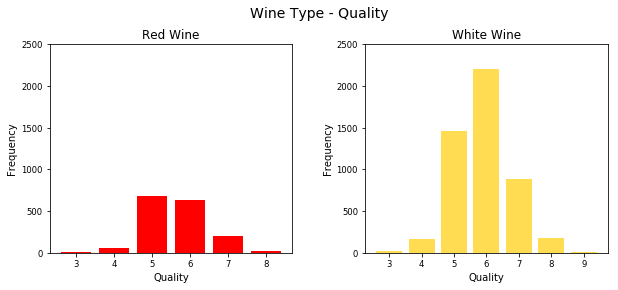

In [28]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Wine Type - Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = red_wine['quality'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red')


ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = white_wine['quality'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
ax2.bar(ww_q[0], ww_q[1], color='#FFDC51')

While this is a good way to visualize categorical data, as you can see, leveraging matplotlib has resulted in writing a lot of code. Another good way is to use stacked bars or multiple bars for the different attributes in a single plot. We can leverage seaborn for the same easily.

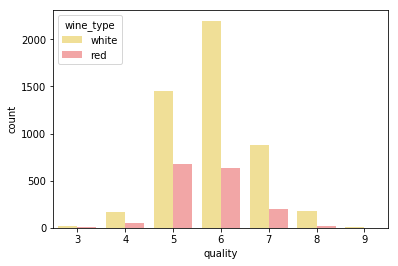

In [29]:
# Multi-bar Plot
cp = sns.countplot(x="quality", hue="wine_type", data=wines, 
                   palette={"red": "#FF9999", "white": "#FFE888"})

This definitely looks cleaner and you can also effectively compare the different categories easily from this single plot.

Let’s look at visualizing mixed attributes in two-dimensions (essentially numeric and categorical together). One way is to use faceting\subplots along with generic histograms or density plots.

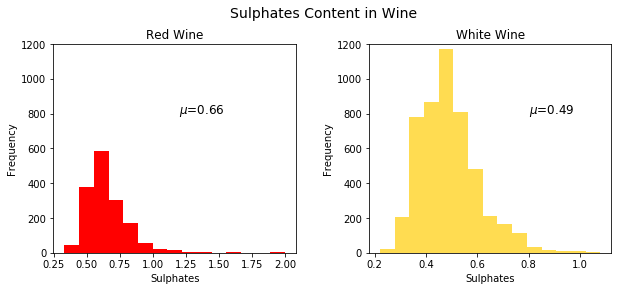

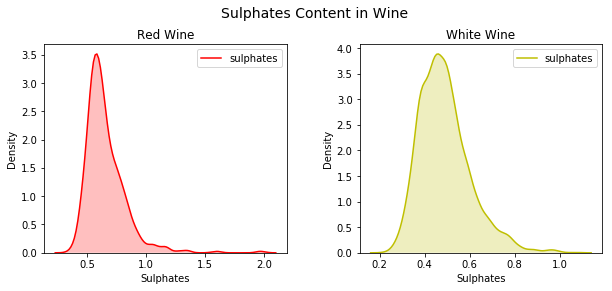

In [30]:
# facets with histograms
fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 1200])
ax1.text(1.2, 800, r'$\mu$='+str(round(red_wine['sulphates'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['sulphates'], 
                                     color='red', bins=15)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 1200])
ax2.text(0.8, 800, r'$\mu$='+str(round(white_wine['sulphates'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['sulphates'], 
                                     color='#FFDC51', bins=15)
                                     

# facets with density plots
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Density") 
sns.kdeplot(red_wine['sulphates'], ax=ax1, shade=True, color='r')

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Density") 
sns.kdeplot(white_wine['sulphates'], ax=ax2, shade=True, color='y')


While this is good, once again we have a lot of boilerplate code which we can avoid by leveraging seaborn and even depict the plots in one single chart.

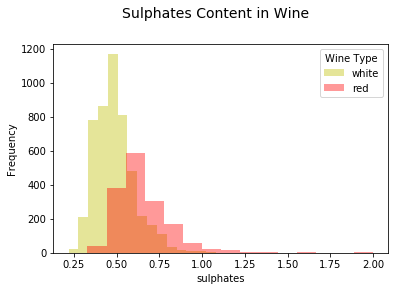

In [31]:
# Using multiple Histograms 
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency") 

g = sns.FacetGrid(wines, hue='wine_type', palette={"red": "r", "white": "y"})
g.map(sns.distplot, 'sulphates', kde=False, bins=15, ax=ax)
ax.legend(title='Wine Type')
plt.close(2)

You can see the plot generated above is clear and concise and we can easily compare across the distributions easily. Besides this, box plots are another way of effectively depicting groups of numeric data based on the different values in the categorical attribute. Box plots are a good way to know the quartile values in the data and also potential outliers.

Text(0, 0.5, 'Wine Alcohol %')

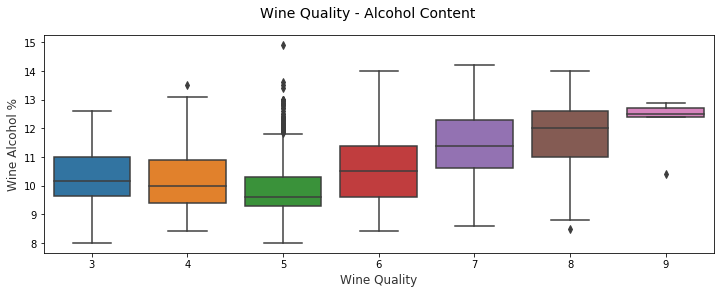

In [32]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", data=wines,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

Another similar visualization is violin plots, which are another effective way to visualize grouped numeric data using kernel density plots (depicts probability density of the data at different values).

Text(0, 0.5, 'Wine Sulphates')

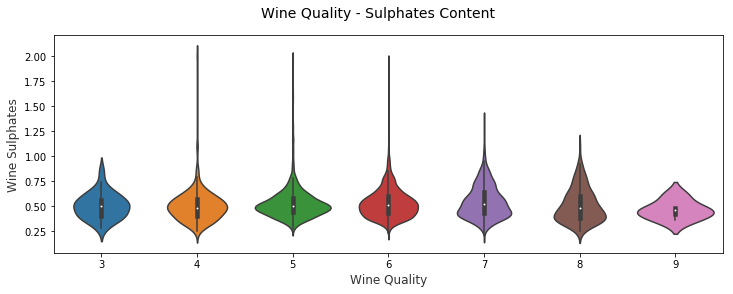

In [33]:
# Violin Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Sulphates Content', fontsize=14)

sns.violinplot(x="quality", y="sulphates", data=wines,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Sulphates",size = 12,alpha=0.8)

You can clearly see the density plots above for the different wine quality categories for wine sulphate

for data higher than three-dimensions, it becomes even more difficult to visualize the same. The best way to go higher than three dimensions is to use plot facets, color, shapes, sizes, depth and so on.

### Visualizing data in Three Dimensions (3-D)

Considering three attributes or dimensions in the data, we can visualize them by considering a pair-wise scatter plot and introducing the notion of color or hue to separate out values in a categorical dimension.

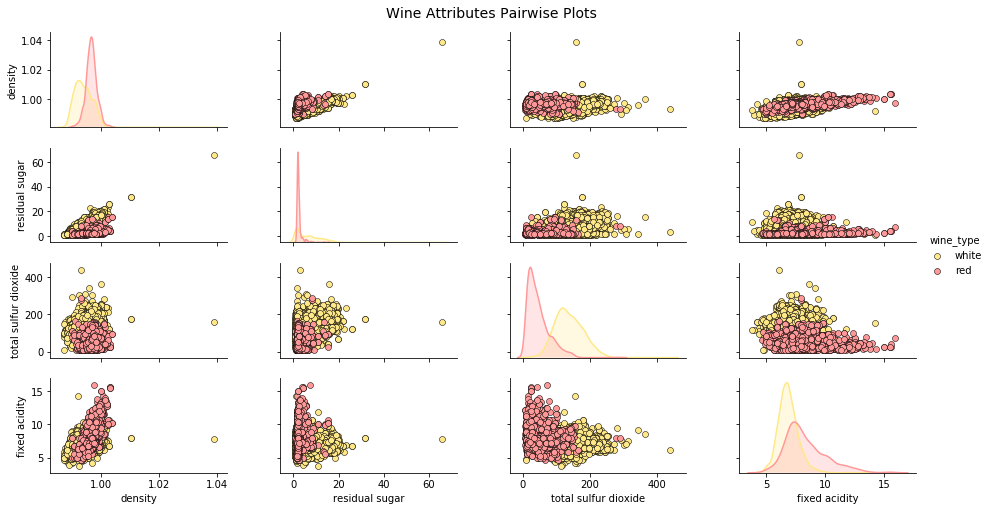

In [34]:
# Scatter Plot with Hue for visualizing data in 3-D
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'wine_type']
pp = sns.pairplot(wines[cols], hue='wine_type', size=1.8, aspect=1.8, 
                  palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

The above plot enables you to check out correlations and patterns and also compare around wine groups. Like we can clearly see total sulfur dioxide and residual sugar is higher for white wine as compared to red.

Let’s look at strategies for visualizing three continuous, numeric attributes. One way would be to have two dimensions represented as the regular length (x-axis)and breadth (y-axis) and also take the notion of depth (z-axis) for the third dimension.



Text(0.5, 0, 'Alcohol')

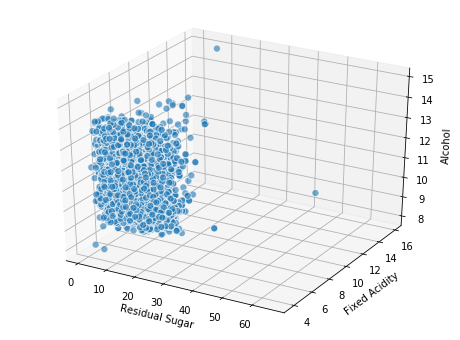

In [35]:
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = wines['residual sugar']
ys = wines['fixed acidity']
zs = wines['alcohol']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Fixed Acidity')
ax.set_zlabel('Alcohol')

But is this effective? Not really! We can however leverage the regular 2-D axes for representing two continuous variables (scatter plot) and introduce the third continuous variable as a categorical variable by binning its values in fixed width bins — popularly these can be quantiles. Based on these quantiles (or bins) we can use size or even hue to represent the third variable here making it 3-D.

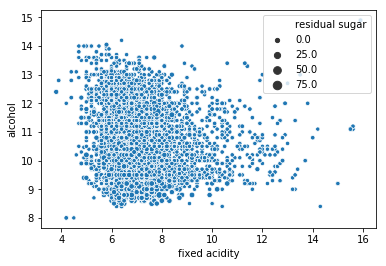

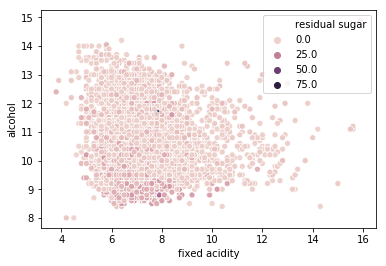

In [39]:
# using size for the 3rd dimension
sc = sns.scatterplot(wines['fixed acidity'], wines['alcohol'], 
                size=wines['residual sugar'])
plt.show()
# using color for the 3rd dimension
sc = sns.scatterplot(wines['fixed acidity'], wines['alcohol'], 
                hue=wines['residual sugar'], alpha=0.9)

A better option would be to use the notion of faceting as the third dimension (essentially subplots) where each subplot indicates a specific bin from our third variable (dimension). Do remember you need to create your bins manually if you are using the scatterplot functionality from matplotlib as opposed to seaborn (depicted in the following example).

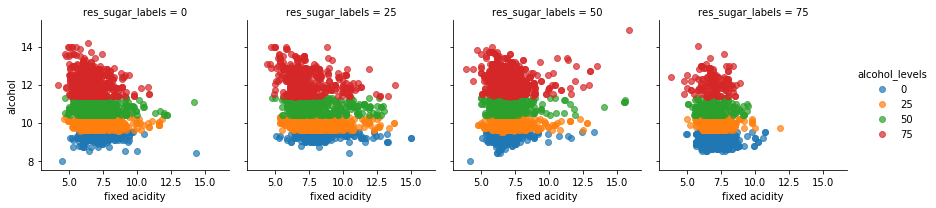

In [40]:
# example depicting representing 3-D continous data
# using color and facets
quantile_list = [0, .25, .5, .75, 1.]
quantile_labels = ['0', '25', '50', '75']
wines['res_sugar_labels'] = pd.qcut(wines['residual sugar'], 
                                    q=quantile_list, labels=quantile_labels)
wines['alcohol_levels'] = pd.qcut(wines['alcohol'], 
                                    q=quantile_list, labels=quantile_labels)
g = sns.FacetGrid(wines, col="res_sugar_labels", 
                  hue='alcohol_levels')
g.map(plt.scatter, "fixed acidity", "alcohol", alpha=.7)
g.add_legend();

The above plot clearly tells us that higher the residual_sugar levels and the alcohol content, lower is the fixed_acidity in the wine samples.

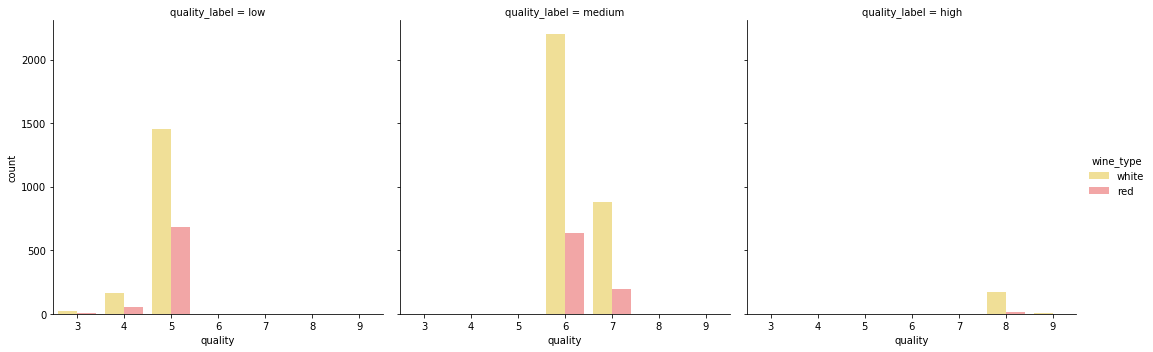

In [41]:
# Visualizing 3-D categorical data using bar plots
# leveraging the concepts of hue and facets
fc = sns.factorplot(x="quality", hue="wine_type", col="quality_label", 
                    data=wines, kind="count",
                    palette={"red": "#FF9999", "white": "#FFE888"})

The chart above clearly shows the frequency pertaining to each of the dimensions and you can see how easy and effective this can be in understanding relevant insights.

Considering visualization for three mixed attributes, we can use the notion of hue for separating our groups in one of the categorical attributes while using conventional visualizations like scatter plots for visualizing two dimensions for numeric attributes.

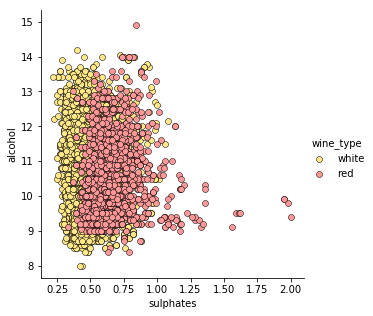

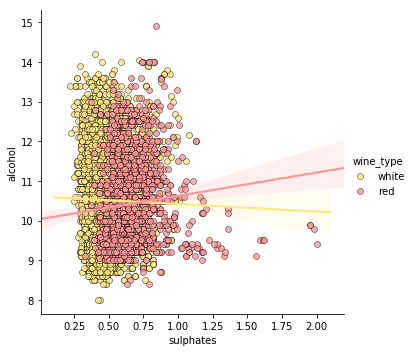

In [42]:
# Visualizing 3-D mix data using scatter plots
# leveraging the concepts of hue for categorical dimension
jp = sns.pairplot(wines, x_vars=["sulphates"], y_vars=["alcohol"], size=4.5,
                  hue="wine_type", palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="k", linewidth=0.5))
                  
# we can also view relationships\correlations as needed                  
lp = sns.lmplot(x='sulphates', y='alcohol', hue='wine_type', 
                palette={"red": "#FF9999", "white": "#FFE888"},
                data=wines, fit_reg=True, legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))  

Thus hue acts as a good separator for the categories or groups and while there is no or very weak correlation as observed above, we can still understand from these plots that sulphates are slightly higher for red wines as compared to white. Instead of a scatter plot, you can also use a kernel density plot to understand the data in three dimensions.

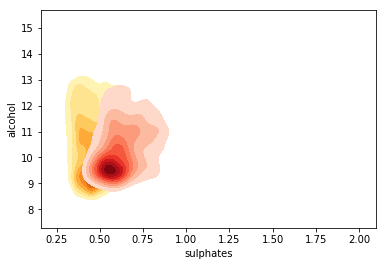

In [45]:
# Visualizing 3-D mix data using kernel density plots
# leveraging the concepts of hue for categorical dimension
ax = sns.kdeplot(white_wine['sulphates'], white_wine['alcohol'],
                  cmap="YlOrBr", shade=True, shade_lowest=False)

ax = sns.kdeplot(red_wine['sulphates'], red_wine['alcohol'],
                  cmap="Reds", shade=True, shade_lowest=False)

It is quite evident and expected that red wine samples have higher sulphate levels as compared to white wines. You can also see the density concentrations based on the hue intensity.

In case we are dealing with more than one categorical attribute in the three dimensions, we can use hue and one of the regular axes for visualizing data and use visualizations like box plots or violin plots to visualize the different groups of data.



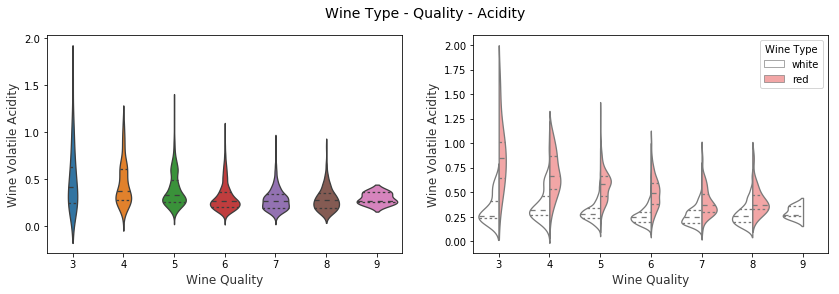

In [46]:
# Visualizing 3-D mix data using violin plots
# leveraging the concepts of hue and axes for > 1 categorical dimensions
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Acidity', fontsize=14)

sns.violinplot(x="quality", y="volatile acidity",
               data=wines, inner="quart", linewidth=1.3,ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Volatile Acidity",size = 12,alpha=0.8)

sns.violinplot(x="quality", y="volatile acidity", hue="wine_type", 
               data=wines, split=True, inner="quart", linewidth=1.3,
               palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Volatile Acidity",size = 12,alpha=0.8)
l = plt.legend(loc='upper right', title='Wine Type')

In the figure above, we can see that in the 3-D visualization on the right hand plot, we have represented wine quality on the x-axis and wine_type as the hue. We can clearly see some interesting insights like volatile acidity is higher for red wines as compared to white wines.

You can also consider using box plots for representing mixed attributes with more than one categorical variable in a similar way.

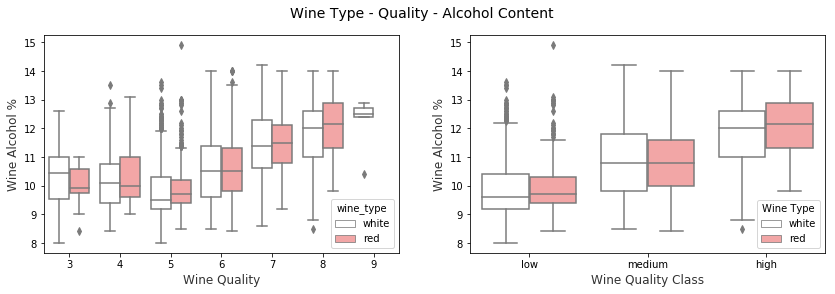

In [48]:
# Visualizing 3-D mix data using box plots
# leveraging the concepts of hue and axes for > 1 categorical dimensions
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x="quality_label", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)
l = plt.legend(loc='best', title='Wine Type')

We can see that both for quality and quality_label attributes, the wine alcohol content increases with better quality. Also red wines tend to have a sightly higher median alcohol content as compared to white wines based on the quality class. However if we check the quality ratings, we can see that for lower rated wines (3 & 4), the white wine median alcohol content is greater than red wine samples. Otherwise red wines seem to have a slightly higher median alcohol content in general as compared to white wines.


### Visualizing data in Four Dimensions (4-D)

Based on our discussion earlier, we leverage various components of the charts visualize multiple dimensions. One way to visualize data in four dimensions is to use depth and hue as specific data dimensions in a conventional plot like a scatter plot.

Text(0.5, 0, 'Fixed Acidity')

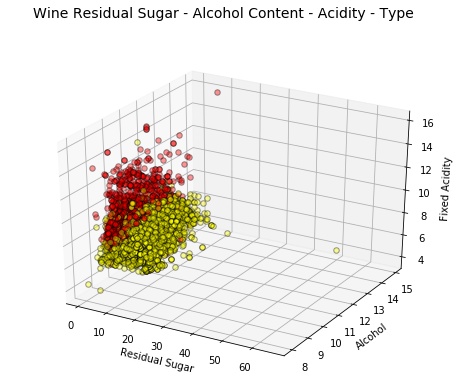

In [50]:
# Visualizing 4-D mix data using scatter plots
# leveraging the concepts of hue and depth
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Type', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

The wine_type attribute is denoted by the hue which is quite evident from the above plot. Also, while interpreting these visualizations start getting difficult due to the complex nature of the plots, you can still gather insights like fixed acidity is higher for red wines and residual sugar is higher for white wines. Of course if there were some association between alcohol and fixed acidity we might have seen a gradually increasing or decreasing plane of data points showing some trend.

Is this effective? Again, not really! One strategy to make this better, is to keep a 2-D plot, but use hue and data point size as data dimensions. Typically this would be a bubble chart similar to what we visualized earlier.

Text(0.5, 1.05, 'Wine Alcohol Content - Fixed Acidity - Residual Sugar - Type')

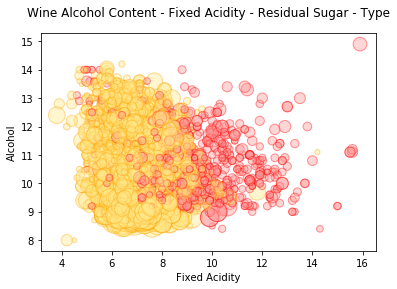

In [51]:
# Visualizing 4-D mix data using bubble plots
# leveraging the concepts of hue and size
size = wines['residual sugar']*25
fill_colors = ['#FF9999' if wt=='red' else '#FFE888' for wt in list(wines['wine_type'])]
edge_colors = ['red' if wt=='red' else 'orange' for wt in list(wines['wine_type'])]

plt.scatter(wines['fixed acidity'], wines['alcohol'], s=size, 
            alpha=0.4, color=fill_colors, edgecolors=edge_colors)

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar - Type',y=1.05)

We use hue to represent wine_type and the data point size to represent residual sugar. We do see similar patterns from what we observed in the previous chart and bubble sizes are larger for white wine in general indicate residual sugar values are higher for white wine as compared to red.

Now this might be better than the previous 4-D plot but honestly its just alright in my opinion. Yes, the hue helps us with seeing which wines have higher or lower fixed acidity but I don’t quite like the notion of size since it is often hard to interpret. Can we do better? Yes we can! Let’s use facets instead as depicted in the following plot.

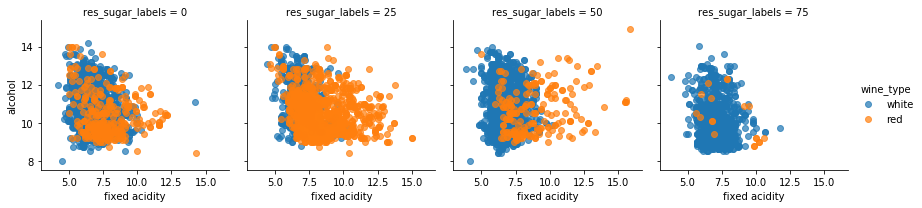

In [52]:
g = sns.FacetGrid(wines, col="res_sugar_labels", 
                  hue='wine_type')
g.map(plt.scatter, "fixed acidity", "alcohol", alpha=.7)
g.add_legend();

Look at that! Clear and concise visuals telling us fixed acidity is lower for white wine as compared to red wine and also residual sugar being much higher for white wine as compared to red wine samples. Also higher the alcohol level, lower the fixed acidity.

If we have more that two categorical attributes to represent, we can reuse our concept of leveraging hue and facets to depict these attributes and regular plots like scatter plots to represent the numeric attributes. Let’s look at a couple of examples.

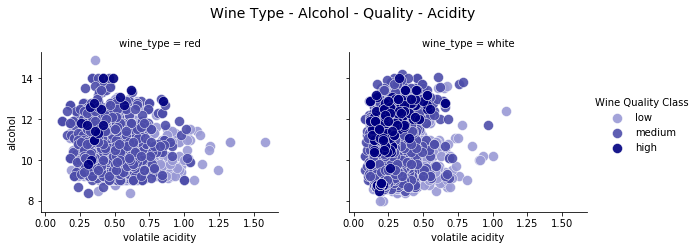

In [53]:
# Visualizing 4-D mix data using scatter plots
# leveraging the concepts of hue and facets for > 1 categorical attributes
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label', 
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('navy', 4)[1:])
g.map(plt.scatter, "volatile acidity", "alcohol", alpha=0.9, 
      edgecolor='white', linewidth=0.5, s=100)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

The effectiveness of this visualization is verified by the fact we can easily spot multiple patterns. The volatile acidity levels for white wines are lower and also high quality wines have lower acidity levels. Also based on white wine samples, high quality wines have higher levels of alcohol and low quality wines have the lowest levels of alcohol!

Let’s take up a similar example with some other attributes and build a visualization in four dimensions.

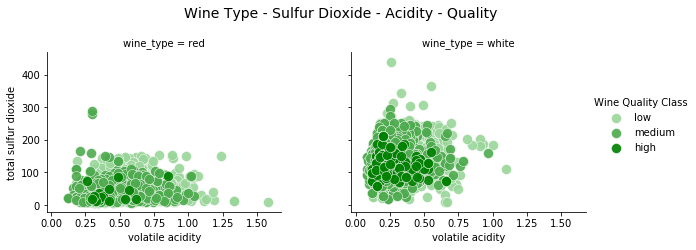

In [54]:
# Visualizing 4-D mix data using scatter plots
# leveraging the concepts of hue and facets for > 1 categorical attributes
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label', 
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('green', 4)[1:])
g.map(plt.scatter, "volatile acidity", "total sulfur dioxide", alpha=0.9, 
      edgecolor='white', linewidth=0.5, s=100)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Acidity - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

We clearly see that high quality wines have lower content of total sulfur dioxide which is quite relevant if you also have the necessary domain knowledge about wine composition. We also see thattotal sulfur dioxide levels for red wine are lower than white wine. The volatile acidity levels are however higher for red wines in several data points.



### Visualizing data in Five Dimensions (5-D)
Once again following a similar strategy as we followed in the previous section, to visualize data in five dimensions, we leverage various plotting components. Let’s use depth, hue and size to represent three of the data dimensions besides regular axes representing the other two dimensions. Since we use the notion of size, we will be basically plotting a three dimensional bubble chart.



Text(0.5, 0, 'Fixed Acidity')

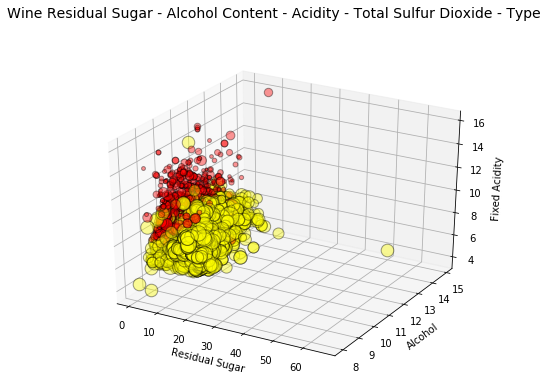

In [55]:
# Visualizing 5-D mix data using bubble charts
# leveraging the concepts of hue, size and depth
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type', fontsize=14)

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(wines['total sulfur dioxide'])
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]

for data, color, size in zip(data_points, colors, ss):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

This chart depicts the same patterns and insights that we talked about in the previous section. However, we can also see that based on the point sizes which are represented by total sulfur dioxide, white wines have higher total sulfur dioxide levels as compared to red wines.

Instead of depth, we can also use facets along with hue to represent more than one categorical attribute in these five data dimensions. One of the attributes representing size can be numerical (continuous) or even categorical (but we might need to represent it with numbers for data point sizes). While we don’t depict that here due to the lack of categorical attributes, feel free to try it out on your own datasets.

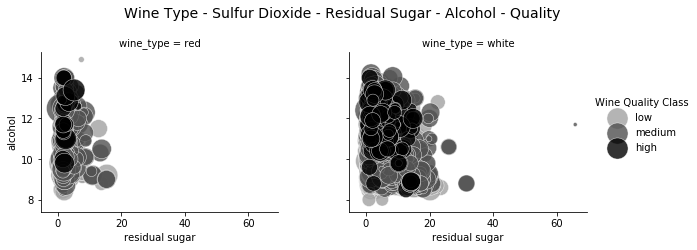

In [56]:
# Visualizing 5-D mix data using bubble charts
# leveraging the concepts of hue, size and facets
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label', 
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('black', 4)[1:])
g.map(plt.scatter, "residual sugar", "alcohol", alpha=0.8, 
      edgecolor='white', linewidth=0.5, s=wines['total sulfur dioxide']*2)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

This is basically an alternative approach to visualizing the same plot which we plotted previously for five dimensions. However, considering the difficulty in interpreting size which we observed previously, you can convert one of the variables, if continuous, to discrete categorical using binning and then use that as an additional faceting parameter as depicted below!

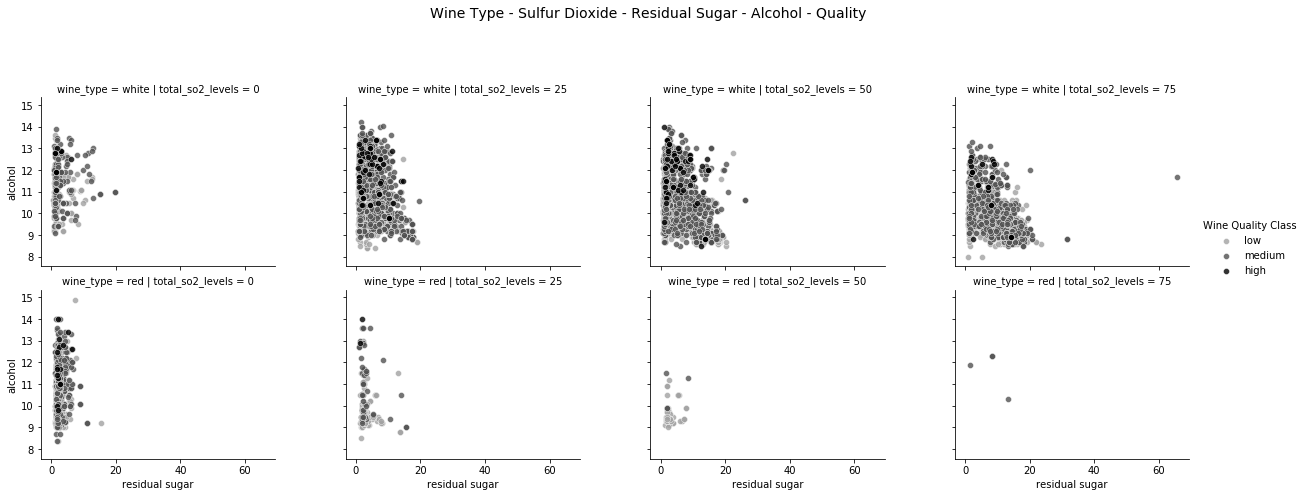

In [58]:
quantile_list = [0, .25, .5, .75, 1.]
quantile_labels = ['0', '25', '50', '75']
wines['total_so2_levels'] = pd.qcut(wines['total sulfur dioxide'], 
                                    q=quantile_list, labels=quantile_labels)
g = sns.FacetGrid(wines, row="wine_type", col='total_so2_levels', hue='quality_label', 
                  hue_order=['low', 'medium', 'high'], palette=sns.light_palette('black', 4)[1:],
                  aspect=1.2, size=3.5)
g.map(plt.scatter, "residual sugar", "alcohol", alpha=0.8, 
      edgecolor='white', linewidth=0.5)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

While the additional dimension of depth or size might confuse many when looking at the plot we plotted previously, this plot due to the advantage of facets, still remains effectively on the 2-D plane and hence is often more effective and easy to interpret.

### Visualizing data in Six Dimensions (6-D)
Now that we are having fun (I hope!), let’s add another data dimension in our visualizations. We will leverage depth, hue, size and shape besides our regular two axes to depict all the six data dimensions.

Text(0.5, 0, 'Fixed Acidity')

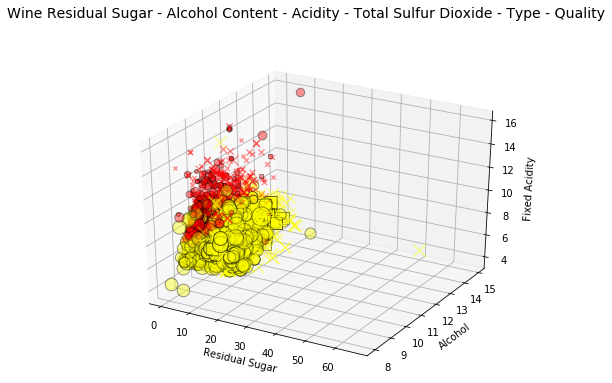

In [59]:
# Visualizing 6-D mix data using scatter charts
# leveraging the concepts of hue, size, depth and shape
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type - Quality', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(wines['total sulfur dioxide'])
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]
markers = [',' if q == 'high' else 'x' if q == 'medium' else 'o' for q in list(wines['quality_label'])]

for data, color, size, mark in zip(data_points, colors, ss, markers):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size, marker=mark)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

Wow that is six dimensions in one plot! We have wine quality_label depicted by shapes, high (the squared pixel), medium (the X marks) and low (the circles) quality wines. The wine_type is represented by hue, fixed acidity by the depth and data point size represents total sulfur dioxide content.

Interpreting this might seem a bit taxing but consider a couple of components at a time when trying to understand what’s going on.

Considering shape & y-axis, we have high and medium quality wines having higher alcohol levels as compared to low quality wines.
Considering hue and size, we have higher content of total sulfur dioxide for white wines as compared to red wines.
Considering depth and hue, we have white wines having lower fixed acidity levels as compared to red wines.
Considering hue and x-axis, we have red wines having lower levels of residual sugar as compared to white wines.
Considering hue and shape, white wines seem to have more high quality wines as compared to red wines (possibly due to larger sample size of white wines).
We can also build a 6-D visualization by removing the depth component and use facets instead for a categorical attribute.

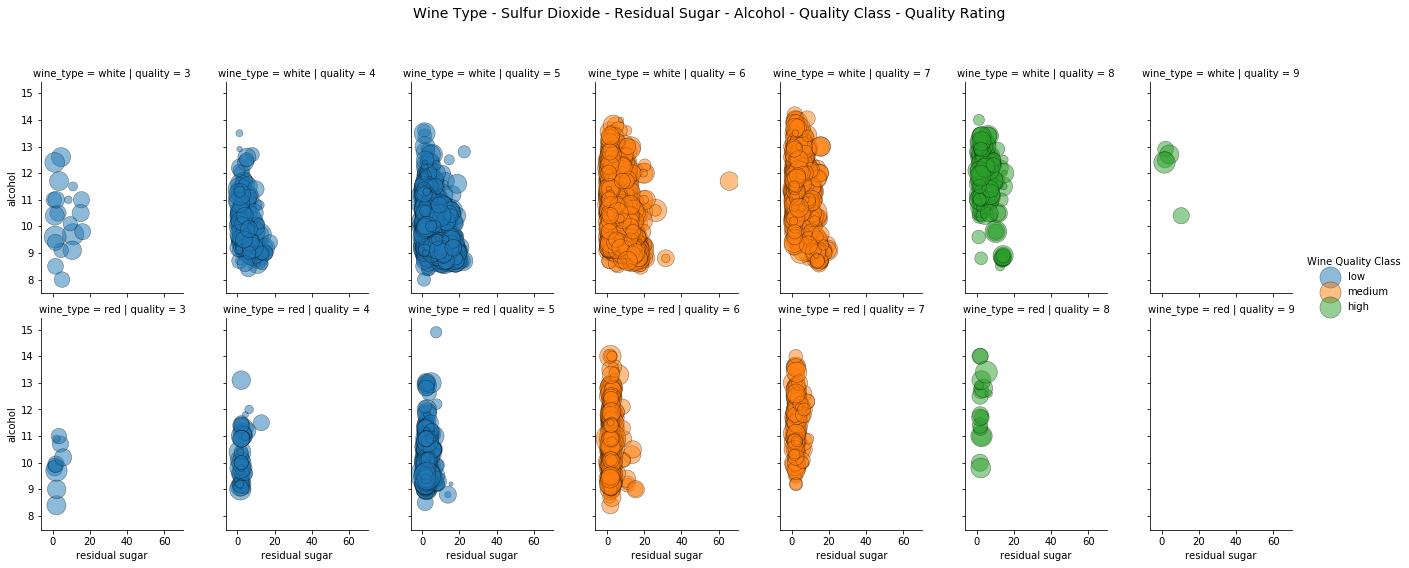

In [61]:
# Visualizing 6-D mix data using scatter charts
# leveraging the concepts of hue, facets and size
g = sns.FacetGrid(wines, row='wine_type', col="quality", hue='quality_label', size=4)
g.map(plt.scatter,  "residual sugar", "alcohol", alpha=0.5, 
      edgecolor='k', linewidth=0.5, s=wines['total sulfur dioxide']*2)
fig = g.fig 
fig.set_size_inches(18, 8)
fig.subplots_adjust(top=0.85, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality Class - Quality Rating', fontsize=14)
l = g.add_legend(title='Wine Quality Class')